In [1]:
import gurobipy as gp
from gurobipy import GRB
import networkx as nx
import numpy as np
import datetime
import time

import random

import math
import pandas as pd

In [2]:
import os
print(os.getcwd())

C:\Users\surya


In [3]:
os.chdir(r'F:/Portfolio/UFL/')

In [4]:
with open('UFL.dat') as file:
    demands = np.fromstring(file.readline(), dtype=int, sep=",\t")
    costs = np.fromstring(file.readline(), dtype=int, sep=',\t')
    facilities = np.fromstring(file.readline(), dtype=int, sep=',\t')

In [5]:
costs_random = np.random.randint(5000, 12500, size=len(facilities))

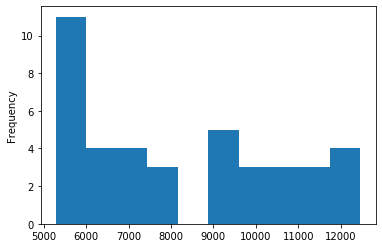

In [6]:
dff = pd.Series(costs_random)
dff.plot.hist()

In [7]:
n_client = len(demands)
n_cost = len(costs)
n_facility = len(facilities)
print(n_client, "Demand Locations or Clients")
print(n_cost, "Fixed costs")
print(n_facility, "Facilities")

45 Demand Locations or Clients
1800 Fixed costs
40 Facilities


In [8]:
costs = costs.reshape(len(demands), len(costs)//len(demands))

In [9]:
df = pd.DataFrame(costs).head(10)
df = df.rename_axis("Facilities", axis="columns")
df = df.rename_axis("Clients", axis="rows")

In [10]:
df.head(5)

Facilities,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Clients,,,,,,,,,,,,,,,,,,,,,
0,169,568,20,315,216,21,292,11,283,161,...,580,55,151,515,470,156,525,486,420,343
1,281,405,160,342,146,262,462,56,497,285,...,563,613,511,126,510,490,417,97,58,255
2,379,394,376,559,544,378,131,234,52,314,...,462,396,491,14,138,383,366,21,239,480
3,404,343,332,383,313,494,417,424,392,110,...,458,552,455,594,502,160,317,326,144,478
4,444,458,204,483,89,164,350,48,366,36,...,607,282,12,370,543,130,341,471,86,382


In [21]:
model = gp.Model('UFL disaggregated')

# Variables
# 2d indices
# x[i,j] = Fraction of client i demand served by facility j

x = model.addVars(n_client, n_facility, obj=costs, vtype=GRB.CONTINUOUS, name='x')
y = model.addVars(n_facility, obj=costs_random, vtype=GRB.BINARY, name='y')

model.addConstrs((x.sum(i, '*') == demands[i] for i in range(n_client)), name='assignment_cons')
model.addConstrs((x[i,j] <= demands[i]*y[j] for i in range(n_client) for j in range(n_facility)), name='disagg_cons')

model.ModelSense = GRB.MINIMIZE
model.write('ufl_all_or_nothing.lp')
model.optimize()

Using license file C:\Users\surya\gurobi.lic
Academic license - for non-commercial use only
Gurobi Optimizer version 9.0.0 build v9.0.0rc2 (win64)
Optimize a model with 1845 rows, 1840 columns and 5400 nonzeros
Model fingerprint: 0x608cfee4
Variable types: 1800 continuous, 40 integer (40 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+02]
  Objective range  [1e+01, 1e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 2e+02]
Found heuristic solution: objective 1454448.0000
Presolve time: 0.00s
Presolved: 1845 rows, 1840 columns, 5400 nonzeros
Variable types: 1800 continuous, 40 integer (40 binary)

Root relaxation: objective 2.258280e+05, 144 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    225828.00000 225828.000  0.00%     -    0s

Explored 0 nodes (144 simplex iterations) in 0.02 seconds
Thread cou

In [42]:
%%cython
import gurobipy as gp
def dm():
    cpdef long long sus = 0
    cpdef long long i
    cpdef long long x = int(1e5)
    m1 = gp.Model('try')
    m1.addVar()
    for i in range(1, x):
        sus = sus + i
        m1.addVar()
    print(sus)
    print(len(m1.getVars()))

In [ ]:
pip install gurobimh

In [235]:
@njit
def sm():
    sus = 0
    x = int(1e100)
    for i in range(1, x):
        sus = sus + i
    print(sus)

In [22]:
from distutils.core import setup
from Cython.Build import cythonize

In [43]:

dm()

4999950000
0


In [30]:
m1.getVars()

[]

In [ ]:
sm()

In [24]:
%load_ext Cython

In [27]:
model.printAttr('x')


    Variable            x 
-------------------------
     x[0,23]           40 
     x[1,38]           38 
     x[2,28]           80 
     x[3,16]           54 
     x[4,32]           14 
     x[5,12]           10 
     x[6,25]           95 
     x[7,25]           41 
     x[8,26]          119 
     x[9,28]           96 
    x[10,12]          181 
    x[11,26]           56 
    x[12,14]           92 
     x[13,1]          158 
     x[14,1]           39 
    x[15,28]           94 
    x[16,12]          146 
    x[17,32]          137 
    x[18,14]          116 
     x[19,1]           29 
    x[20,23]           74 
    x[21,23]           39 
    x[22,32]          108 
    x[23,25]          127 
    x[24,28]           77 
    x[25,16]           22 
    x[26,25]          144 
    x[27,25]          179 
    x[28,25]           12 
    x[29,32]           66 
    x[30,26]           96 
    x[31,16]           19 
    x[32,23]          172 
    x[33,38]           68 
    x[34,14]          182 
 

In [15]:
model.computeIIS()
model.write('infeas.ilp')

IIS runtime: 0.00 seconds


GurobiError: Cannot compute IIS on a feasible model

In [11]:
x_old = [x[i,j].getAttr('x') for i in range(n_client) for j in range(n_facility)]

AttributeError: Unable to retrieve attribute 'x'

In [12]:
x_old

NameError: name 'x_old' is not defined

In [25]:
x_lp = [x[i,j].getAttr('x') for i in range(n_client) for j in range(n_facility)]

In [38]:
[x==y for x,y in zip(x_old, x_lp)]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,


In [34]:
182919 - 10*5000

132919

In [33]:
sum([y[i].getAttr('x') for i in range(n_facility)])

10.0

In [41]:
np.all([x== int(x) for x in x_lp])

True